Cette partie consiste en l'exploration des données disponibles après leur obtention via l'API. Nous allons effectuer des statistiques descriptives inférentielles afin d'essayer de comprendre les tendances des données pour pouvoir optimiser notre travail dans la partie modélisation.

In [45]:
import pandas as pd
import numpy as np 
import plotly_express as px
import plotly.graph_objects as go

In [46]:
from  clean_donnees import liste_propre

data = pd.concat([liste_propre(code_commune=None, taille_echantillon=10000)],
                axis=0, 
                ignore_index=True)
data.head(2)

,_id,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,tr002_type_batiment_description,code_insee_commune_actualise,latitude,longitude,geo_adresse,consommation_surface_ratio
0,WRYV9xQCjLUgZ4MAK3wKu,132.0,3.0,29.0,190.0,4.0,5200.0,Maison Individuelle,01430,46.040911,5.317098,3 Impasse du Foyer Rural 01160 Varambon,0.694737
1,y54XQHgRuWB5L1wiVTGJ4,221.0,4.0,3.0,78.2,1.0,2006.0,Logement,05120,44.773510,6.954523,Rue de la Bluette 05460 Abriès-Ristolas,2.826087


In [47]:
data.describe()

,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,latitude,longitude,consommation_surface_ratio
count,4415.000000,4415.000000,4415.000000,4415.000000,4415.00000,4415.000000,4415.000000,4415.000000,4415.000000
mean,262.284691,4.611325,35.564179,108.587223,3.90487,1940.871801,46.962126,2.670729,3.825178
std,125.453726,1.219000,57.451440,144.325985,1.71866,244.036929,2.103477,2.713725,4.285241
min,-4.000000,1.000000,0.710000,6.000000,1.00000,-1.000000,41.846973,-4.618714,-0.040708
25%,179.000000,4.000000,11.110000,66.000000,3.00000,1948.000000,45.445252,0.746452,1.645733
50%,239.110000,5.000000,24.060000,89.570000,4.00000,1974.000000,47.401455,2.500520,2.698238
75%,321.000000,5.000000,50.530000,120.300000,5.00000,1989.000000,48.720149,4.848111,4.437583
max,1217.760000,7.000000,2326.330000,4120.000000,7.00000,5200.000000,51.050349,9.552078,77.426000


Grâce à la documentation, nous avons obtenu les unités correspondantes pour chaque ligne. Ainsi la consommation_energie est en kWhEP/m².an, l'estimation_ges en  Kg eqCO2/m².an. Nous mettons ci-après le lien conduisant au métadata: ADEME - DPE - Dictionnaire de données - 2020-06-08 (1).pdf. On obeserve que sur 10 000 données obtenues par les resquests de l'API seulement 4415 sont entières. La myenne de la colonne "classe_consommation_energie" qui est à 4.611325 indique que la moyenne des bâtiments ont un DPE entre E et D et plus proche de E avec assez peu de variance.

De même la moyenne des latitudes et longitudes donne un point qui semble être 'le centre' de la France ce qui laisse penser que les données sont un échantillon représentatif de toute la métropole.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id                              4415 non-null   object 
 1   consommation_energie             4415 non-null   float64
 2   classe_consommation_energie      4415 non-null   float64
 3   estimation_ges                   4415 non-null   float64
 4   surface_thermique_lot            4415 non-null   float64
 5   classe_estimation_ges            4415 non-null   float64
 6   annee_construction               4415 non-null   float64
 7   tr002_type_batiment_description  4415 non-null   object 
 8   code_insee_commune_actualise     4415 non-null   object 
 9   latitude                         4415 non-null   float64
 10  longitude                        4415 non-null   float64
 11  geo_adresse                      4415 non-null   object 
 12  consommation_surface

In [49]:
condition=(data['annee_construction']<1800)|(data['annee_construction']>2023)|(data['consommation_energie']<0)
data=data[~condition]
data.describe()

,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,latitude,longitude,consommation_surface_ratio
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,263.459804,4.623532,35.904363,108.665409,3.924937,1969.439558,46.945416,2.667341,3.844951
std,125.660634,1.214783,57.826303,144.786607,1.715318,29.345289,2.099860,2.719824,4.310654
min,7.450000,1.000000,0.740000,6.000000,1.000000,1800.000000,41.846973,-4.618714,0.028818
25%,179.895000,4.000000,11.410000,66.000000,3.000000,1948.000000,45.412857,0.726330,1.651363
50%,240.320000,5.000000,25.000000,89.900000,4.000000,1974.000000,47.396899,2.500556,2.705497
75%,322.080000,5.000000,51.000000,120.705000,5.000000,1989.000000,48.704127,4.848111,4.451375
max,1217.760000,7.000000,2326.330000,4120.000000,7.000000,2013.000000,51.050349,9.552078,77.426000


In [50]:
value_counts = data['classe_consommation_energie'].value_counts().reset_index()

value_counts.columns = ['classe_consommation_energie', 'Count']
fig = px.bar(value_counts, 
             x='classe_consommation_energie', 
             y='Count', 
             title='Value Counts of classe_consommation_energie',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8,
             width=800,
             height=500)
fig.show()

In [51]:
value_counts = data['tr002_type_batiment_description'].value_counts().reset_index()

value_counts.columns = ['tr002_type_batiment_description', 'Count']
fig = px.bar(value_counts, 
             x='tr002_type_batiment_description', 
             y='Count', 
             title='Value Counts of building type',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8)


fig.update_layout(
    title="Value Counts of building type",
    xaxis_title="Building type",
    yaxis_title="Count",
    hoverlabel_bgcolor='white'
    )

fig.show()

In [52]:
value_counts = data['consommation_energie'].value_counts().reset_index()
value_counts.columns = ['consommation_energie', 'Count']

fig = px.histogram(value_counts, 
             x='consommation_energie', 
             y='Count', 
             barmode='overlay',
             title='Value Counts of consommation_energie',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8)


fig.update_layout(
    title="Value Counts of building type",
    xaxis_title="Consommation énergie",
    yaxis_title="Count",
    hoverlabel_bgcolor='white'
    )

fig.show()
# data['consommation_energie'].hist(bins=100)


In [53]:
value_counts = data['consommation_surface_ratio'].value_counts().reset_index()
value_counts.columns = ['consommation_surface_ratio', 'Count']

fig = px.histogram(value_counts, 
             x='consommation_surface_ratio', 
             y='Count', 
             barmode='overlay',
             title='Value Counts of ratio consommation_energie',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8)


fig.update_layout(
    title="Value Counts of ratio consommation-surface",
    xaxis_title="Consommation énergie",
    yaxis_title="Count",
    hoverlabel_bgcolor='white'
    )

fig.show()

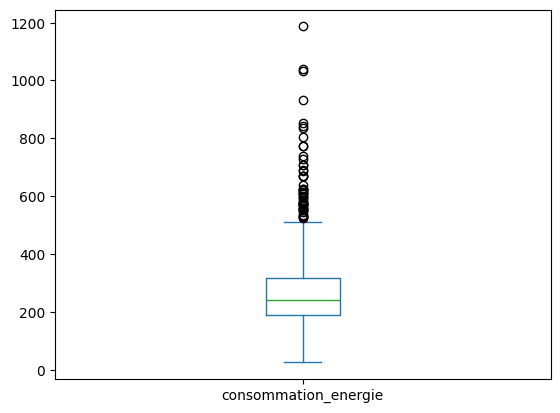

In [54]:
data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].plot.box()
Q1=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.25)
Q3=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.75)
IQR=Q3-Q1
coef=IQR*1.5
limite_inf=Q1-coef
limite_sup=Q3+coef
result=data[(data['consommation_energie']>limite_sup)|(data['consommation_energie']<limite_inf)]
data_clean=data.drop(result.index)
# data_clean['consommation_energie'].hist(bins=100)


In [55]:


for elem in data['tr002_type_batiment_description'].unique().tolist(): 
    data_sorted= data[data['tr002_type_batiment_description']==elem]
    print(f"{elem}: {np.mean(data_sorted['consommation_energie'])} kWhEP/m².an ")
    print(f"{elem}: {np.mean(data_sorted['estimation_ges'])} Kg eqCO2/m².an ")



Logement: 267.7602566225166 kWhEP/m².an 
Logement: 36.705687086092716 Kg eqCO2/m².an 
Maison Individuelle: 261.11607280927836 kWhEP/m².an 
Maison Individuelle: 35.53956829896907 Kg eqCO2/m².an 
Bâtiment collectif à usage principal d'habitation: 330.5564516129032 kWhEP/m².an 
Bâtiment collectif à usage principal d'habitation: 41.20516129032258 Kg eqCO2/m².an 


In [56]:
from comprendre_api.Clean_donnees import liste_propre
import plotly_express as px

def testgraph(code_commune=None, taille_echantillon=3000):
    data = liste_propre(code_commune, taille_echantillon)
    value_counts = data['classe_consommation_energie'].value_counts().reset_index()
    value_counts.columns = ['classe_consommation_energie', 'Count']

    fig = px.bar(value_counts, 
                 x='classe_consommation_energie', 
                 y='Count', 
                 title='Distribution des classes de consommation d\'énergie',
                 template='plotly_dark',
                 color_discrete_sequence=px.colors.qualitative.Plotly,
                 labels={'classe_consommation_energie': 'Classe de Consommation d\'Énergie', 'Count': 'Nombre'},
                 opacity=0.8,
                 width=800,
                 height=500)
        
    # Ajuster la mise en page
    fig.update_layout(
        margin=dict(l=20, r=20, t=50, b=20),
        font=dict(family="Arial", size=12, color=""),
        paper_bgcolor="white",
        plot_bgcolor="white"
    )

    return fig

In [57]:
testgraph(75016, 10000).show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of layout.font
        Received value: ''

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen